In [1]:
!git clone https://github.com/pondelion/FinAppModel.git

Cloning into 'FinAppModel'...
remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (461/461), done.
remote: Compressing objects: 100% (260/260), done.
remote: Total 461 (delta 204), reused 394 (delta 143), pack-reused 0
Receiving objects: 100% (461/461), 88.86 KiB | 1.20 MiB/s, done.
Resolving deltas: 100% (204/204), done.


In [2]:
%cd FinAppModel

/content/FinAppModel


In [3]:
!pip install pipenv

     |████████████████████████████████| 3.6 MB 4.2 MB/s 
     |████████████████████████████████| 6.5 MB 38.9 MB/s 
     |████████████████████████████████| 461 kB 67.7 MB/s 


In [6]:
!python -V

Python 3.7.12


In [7]:
!ls

extra_install.sh  Pipfile	  README.md  ta-lib
fin_app_models	  pyproject.toml  setup.py   tests


In [ ]:
!./extra_install.sh > /dev/null

In [5]:
!pipenv install --skip-lock --dev -e .

Neither 'pyenv' nor 'asdf' could be found to install Python.
You can specify specific versions of Python with:
$ pipenv --python path/to/python


In [10]:
!pip install -r requirements.txt

     |████████████████████████████████| 54 kB 1.6 MB/s 
     |████████████████████████████████| 1.1 MB 8.4 MB/s 
  Using cached alembic-1.5.4-py2.py3-none-any.whl (156 kB)
  Using cached async_timeout-3.0.1-py3-none-any.whl (8.2 kB)
  Using cached attrs-20.3.0-py2.py3-none-any.whl (49 kB)
     |████████████████████████████████| 131 kB 43.4 MB/s 
     |████████████████████████████████| 8.5 MB 38.9 MB/s 
  Using cached catboost-0.24.4-cp37-none-manylinux1_x86_64.whl (65.7 MB)
  Using cached cliff-3.7.0-py3-none-any.whl (80 kB)
  Using cached cmaes-0.8.1-py3-none-any.whl (15 kB)
  Using cached cmd2-1.5.0-py3-none-any.whl (133 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached colorlog-4.7.2-py2.py3-none-any.whl (10 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached Cython-0.29.21-cp37-cp37m-manylinux1_x86_64.whl (2.0 MB)
  Using cached fsspec-0.8.5-py3-none-any.whl (98 kB)
  Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)
  Usi

In [2]:
!pip install -e .

Obtaining file:///content/FinAppModel
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Running setup.py develop for fin-app-model


In [3]:
!python -m pytest tests -s

============================= test session starts ==============================
platform linux -- Python 3.7.12, pytest-6.2.2, py-1.10.0, pluggy-0.13.1
rootdir: /content/FinAppModel
plugins: typeguard-2.7.1
collected 9 items                                                              

tests/test_feature.py             ohlc_testdata_close  ...  ohlc_testdata_month
2015-04-05            -7.679183  ...                    4
2015-04-06            -2.627541  ...                    4
2015-04-08            -6.427653  ...                    4
2015-04-09            -4.679658  ...                    4
2015-04-11            -5.191812  ...                    4
...                         ...  ...                  ...
2020-01-23            21.813917  ...                    1
2020-01-24            18.547152  ...                    1
2020-01-25            21.016120  ...                    1
2020-01-26            21.215633  ...                    1
2020-01-27            19.185327  ...               

In [1]:
from glob import glob
from datetime import date
import pandas as pd
from fastprogress import progress_bar as pb

In [3]:
df_btc_return = pd.read_csv('/content/drive/MyDrive/data/crypto/historical/gmo/return_btc_5min.csv')
df_btc_return['timestamp'] = pd.to_datetime(df_btc_return['timestamp'])
df_btc_return.set_index('timestamp', inplace=True)

In [4]:
df_btc_return

,size_buy,price_buy,size_sell,price_sell,return_1h,return_3h,return_6h,return_12h,return_18h,return_24h,return_48h,return_72h,return_120h,return_168h,return_720h,return_1440h,return_2160h
timestamp,,,,,,,,,,,,,,,,,
2019-12-31 21:15:00,0.003475,777540.00,0.012000,7.775560e+05,1.000916,1.000649,1.006713,1.002986,1.007373,1.008283,0.968452,1.017735,1.029784,1.132307,1.336909,1.201652,0.905107
2019-12-31 21:20:00,0.001000,777580.00,0.018333,7.776577e+05,1.000900,1.000561,1.007009,1.003472,1.006925,1.008224,0.968900,1.016635,1.029214,1.130117,1.336218,1.199488,0.904578
2019-12-31 21:25:00,0.001367,777862.00,0.024667,7.777593e+05,1.000971,1.000161,1.007203,1.002903,1.006875,1.007851,0.969047,1.015219,1.027670,1.129068,1.335293,1.198884,0.905345
2019-12-31 21:30:00,0.001000,777862.00,0.031000,7.778610e+05,1.001404,1.000124,1.007762,1.003104,1.007004,1.007844,0.969545,1.014171,1.026500,1.126282,1.334464,1.199147,0.903535
2019-12-31 21:35:00,0.001000,777830.00,0.065500,7.776455e+05,1.001878,1.000129,1.007502,1.003347,1.007482,1.007878,0.970083,1.013165,1.025095,1.125580,1.332712,1.199459,0.903243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 20:30:00,0.000158,5463890.25,0.004437,5.463901e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 20:35:00,0.000100,5469121.00,0.005000,5.469120e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 20:40:00,0.003750,5465023.00,0.010000,5.462800e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
TARGET_COLS = [col for col in df_btc_return.columns if 'return' in col]

In [37]:
TARGET_COLS

['return_1h',
 'return_3h',
 'return_6h',
 'return_12h',
 'return_18h',
 'return_24h',
 'return_48h',
 'return_72h',
 'return_120h',
 'return_168h',
 'return_720h',
 'return_1440h',
 'return_2160h']

In [5]:
from fin_app_models.feature.creation.single_ts import create_single_ts_features
from fin_app_models.feature.selection.random_selection import random_feat_select

In [108]:
# 5分間隔データのためデフォルト値(日単位想定)スケーリング 24*60/5=288
scale = 10

In [109]:
df_feats = create_single_ts_features(
    df_btc_return['price_buy'],
    macd_fastperiod=scale*12,
    macd_slowperiod=scale*26,
    macd_signalperiod=scale*9,
    bb_periods=[scale*7, scale*20, scale*30, scale*60],
    basic_stats_period=scale*14,
    atr_period=scale*14,
    return_lags=[scale*1, scale*3, scale*7, scale*10, scale*20, scale*30, scale*60],
    col_name_prefix='buy',
)

In [110]:
df_feats

,buy_price_buy,buy_rsi,buy_macd,buy_bb70_high,buy_bb70_mid,buy_bb70_low,buy_bb70_std,buy_bb200_high,buy_bb200_mid,buy_bb200_low,buy_bb200_std,buy_bb300_high,buy_bb300_mid,buy_bb300_low,buy_bb300_std,buy_bb600_high,buy_bb600_mid,buy_bb600_low,buy_bb600_std,buy_max_140,buy_min_140,buy_median_140,buy_skew_140,buy_kurt_140,buy_ppo_12_26,buy_apo_12_26,buy_cmo_14,buy_return_lag10,buy_return_lag30,buy_return_lag70,buy_return_lag100,buy_return_lag200,buy_return_lag300,buy_return_lag600,buy_momentum_10_30,buy_momentum_10_70,buy_momentum_10_100,buy_momentum_10_200,buy_momentum_10_300,buy_momentum_10_600,buy_weekday,buy_year,buy_month
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31 21:15:00,777540.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019,12
2019-12-31 21:20:00,777580.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019,12
2019-12-31 21:25:00,777862.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019,12
2019-12-31 21:30:00,777862.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019,12
2019-12-31 21:35:00,777830.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 20:30:00,5463890.25,52.053353,0.386012,5.512406e+06,5.457357e+06,5.402309e+06,55048.601949,5.489854e+06,5.430425e+06,5.370997e+06,59428.728300,5.503284e+06,5.403799e+06,5.304313e+06,99485.438939,5.549361e+06,5.431428e+06,5.313495e+06,117932.874037,5514611.25,5389414.5,5.426928e+06,0.749270,-0.160018,-0.198684,-10856.890892,4.106707,0.000236,-0.000242,0.000165,0.000109,0.000067,0.000091,-0.000006,-0.000478,-0.000071,-0.000127,-0.000169,-0.000145,-0.000243,5,2022,1
2022-01-01 20:35:00,5469121.00,56.908261,0.389131,5.511948e+06,5.458265e+06,5.404581e+06,53683.189433,5.490221e+06,5.430821e+06,5.371421e+06,59400.424191,5.503568e+06,5.404305e+06,5.305042e+06,99262.908053,5.549308e+06,5.431407e+06,5.313506e+06,117901.205812,5514611.25,5389414.5,5.427137e+06,0.719965,-0.225296,-0.154656,-8449.730636,13.816522,0.000350,-0.000216,0.000167,0.000118,0.000073,0.000094,-0.000004,-0.000566,-0.000183,-0.000232,-0.000277,-0.000256,-0.000354,5,2022,1
2022-01-01 20:40:00,5465023.00,52.429184,0.390988,5.511363e+06,5.459092e+06,5.406820e+06,52271.268808,5.490535e+06,5.431180e+06,5.371825e+06,59355.015654,5.503850e+06,5.404774e+06,5.305699e+06,99075.202347,5.549249e+06,5.431382e+06,5.313515e+06,117867.035313,5514611.25,5389414.5,5.428852e+06,0.692667,-0.277849,-0.123421,-6742.499866,4.858368,0.000211,-0.000259,0.000152,0.000111,0.000066,0.000087,-0.000004,-0.000470,-0.000059,-0.000101,-0.000145,-0.000124,-0.000216,5,2022,1


In [111]:
df_feats.dropna(inplace=True)

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
FEAT_COLS = df_feats.columns.tolist()

In [114]:
FEAT_COLS

['buy_price_buy',
 'buy_rsi',
 'buy_macd',
 'buy_bb70_high',
 'buy_bb70_mid',
 'buy_bb70_low',
 'buy_bb70_std',
 'buy_bb200_high',
 'buy_bb200_mid',
 'buy_bb200_low',
 'buy_bb200_std',
 'buy_bb300_high',
 'buy_bb300_mid',
 'buy_bb300_low',
 'buy_bb300_std',
 'buy_bb600_high',
 'buy_bb600_mid',
 'buy_bb600_low',
 'buy_bb600_std',
 'buy_max_140',
 'buy_min_140',
 'buy_median_140',
 'buy_skew_140',
 'buy_kurt_140',
 'buy_ppo_12_26',
 'buy_apo_12_26',
 'buy_cmo_14',
 'buy_return_lag10',
 'buy_return_lag30',
 'buy_return_lag70',
 'buy_return_lag100',
 'buy_return_lag200',
 'buy_return_lag300',
 'buy_return_lag600',
 'buy_momentum_10_30',
 'buy_momentum_10_70',
 'buy_momentum_10_100',
 'buy_momentum_10_200',
 'buy_momentum_10_300',
 'buy_momentum_10_600',
 'buy_weekday',
 'buy_year',
 'buy_month']

In [115]:
df_feats_random = random_feat_select(
    {}, # OHLC df dict
    {'price_buy': df_btc_return['price_buy']},
    min_select_tss=1,
)

In [116]:
df_feats_random

,price_buy_bb7_low,price_buy_bb60_high,price_buy_year,price_buy_skew_14,price_buy_momentum_1_20,price_buy_bb20_high,price_buy_bb7_high,price_buy_bb20_mid,price_buy_macd,price_buy_momentum_1_7,price_buy_return_lag20,price_buy_return_lag1,price_buy_cmo_14,price_buy_bb60_mid,price_buy_momentum_1_60
timestamp,,,,,,,,,,,,,,,
2019-12-31 21:15:00,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 21:20:00,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000051,NaN,NaN,NaN
2019-12-31 21:25:00,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000363,NaN,NaN,NaN
2019-12-31 21:30:00,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2019-12-31 21:35:00,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000041,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 20:30:00,5.447199e+06,5.507088e+06,2022,1.452830,-0.001457,5.481262e+06,5.462829e+06,5.460497e+06,-0.439016,-0.001030,-0.000128,0.001329,4.106707,5.465256e+06,-0.001227
2022-01-01 20:35:00,5.445480e+06,5.507247e+06,2022,1.907359,-0.001022,5.480055e+06,5.469502e+06,5.460144e+06,-0.317902,-0.000504,-0.000064,0.000957,13.816522,5.465515e+06,-0.000910
2022-01-01 20:40:00,5.446297e+06,5.507322e+06,2022,1.425377,0.000602,5.476966e+06,5.471734e+06,5.459340e+06,-0.251008,0.001029,-0.000147,-0.000749,4.858368,5.465649e+06,0.000774


In [117]:
df_feats_target = df_feats.merge(df_btc_return, how='inner', left_index=True, right_index=True)

In [118]:
df_feats_target

,buy_price_buy,buy_rsi,buy_macd,buy_bb70_high,buy_bb70_mid,buy_bb70_low,buy_bb70_std,buy_bb200_high,buy_bb200_mid,buy_bb200_low,buy_bb200_std,buy_bb300_high,buy_bb300_mid,buy_bb300_low,buy_bb300_std,buy_bb600_high,buy_bb600_mid,buy_bb600_low,buy_bb600_std,buy_max_140,buy_min_140,buy_median_140,buy_skew_140,buy_kurt_140,buy_ppo_12_26,buy_apo_12_26,buy_cmo_14,buy_return_lag10,buy_return_lag30,buy_return_lag70,buy_return_lag100,buy_return_lag200,buy_return_lag300,buy_return_lag600,buy_momentum_10_30,buy_momentum_10_70,buy_momentum_10_100,buy_momentum_10_200,buy_momentum_10_300,buy_momentum_10_600,buy_weekday,buy_year,buy_month,size_buy,price_buy,size_sell,price_sell,return_1h,return_3h,return_6h,return_12h,return_18h,return_24h,return_48h,return_72h,return_120h,return_168h,return_720h,return_1440h,return_2160h
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02 23:15:00,7.545277e+05,45.090951,-0.246194,7.567953e+05,7.546686e+05,7.525419e+05,2126.670487,7.854476e+05,7.663798e+05,7.473120e+05,19067.804218,7.885599e+05,7.698528e+05,7.511457e+05,18707.074158,7.942738e+05,7.759886e+05,7.577034e+05,18285.219595,776775.00,751670.0,7.558719e+05,0.291045,-1.773720,0.026885,202.933494,-9.818098,-0.000093,0.000047,0.000054,-0.000250,-0.000128,-0.000125,-0.000050,0.000139,0.000147,-0.000157,-0.000035,-0.000032,0.000042,3,2020,1,0.008467,7.545277e+05,0.020000,7.541600e+05,0.998552,0.990340,1.026240,1.047874,1.050922,1.046884,1.051771,1.046887,1.159231,1.133862,1.347821,1.277475,0.931851
2020-01-02 23:20:00,7.545243e+05,45.050979,-0.246160,7.567818e+05,7.546892e+05,7.525966e+05,2092.587208,7.853966e+05,7.662840e+05,7.471715e+05,19112.551755,7.884916e+05,7.697593e+05,7.510270e+05,18732.266854,7.943186e+05,7.759502e+05,7.575818e+05,18368.393939,776775.00,751670.0,7.557893e+05,0.320155,-1.754348,0.013689,103.335630,-9.898042,-0.000053,0.000051,0.000027,-0.000258,-0.000125,-0.000122,-0.000050,0.000104,0.000080,-0.000205,-0.000073,-0.000069,0.000002,3,2020,1,0.000533,7.545243e+05,0.420140,7.538340e+05,0.998377,0.992281,1.027097,1.048820,1.050715,1.046794,1.051221,1.048276,1.157444,1.133906,1.348784,1.279217,0.931890
2020-01-02 23:25:00,7.545622e+05,45.639997,-0.246092,7.567828e+05,7.546987e+05,7.526145e+05,2084.146868,7.853492e+05,7.661908e+05,7.470324e+05,19158.418871,7.884253e+05,7.696671e+05,7.509089e+05,18758.196498,7.943617e+05,7.759113e+05,7.574609e+05,18450.396769,776775.00,751670.0,7.557280e+05,0.349454,-1.732944,-0.000745,-5.624840,-8.720006,-0.000052,0.000058,0.000013,-0.000264,-0.000122,-0.000120,-0.000051,0.000110,0.000065,-0.000212,-0.000070,-0.000068,0.000001,3,2020,1,0.052283,7.545622e+05,0.002700,7.540090e+05,0.998087,0.990207,1.027086,1.047853,1.051057,1.046647,1.050614,1.049609,1.157615,1.135305,1.348295,1.277930,0.933850
2020-01-02 23:30:00,7.546000e+05,46.260363,-0.245989,7.567743e+05,7.546920e+05,7.526096e+05,2082.346021,7.853103e+05,7.661022e+05,7.468941e+05,19208.057587,7.883610e+05,7.695761e+05,7.507913e+05,18784.854335,7.944040e+05,7.758726e+05,7.573411e+05,18531.421467,776775.00,751670.0,7.556667e+05,0.379073,-1.709274,-0.009026,-68.144071,-7.479274,-0.000026,0.000063,-0.000009,-0.000253,-0.000116,-0.000118,-0.000051,0.000089,0.000017,-0.000228,-0.000090,-0.000093,-0.000025,3,2020,1,0.104033,7.546000e+05,0.027779,7.544409e+05,0.997244,0.992287,1.026809,1.046316,1.051398,1.049953,1.050864,1.051511,1.158900,1.134376,1.347807,1.276610,0.945952
2020-01-02 23:35:00,7.550130e+05,52.617307,-0.245750,7.567835e+05,7.547014e+05,7.526192e+05,2082.117497,7.852734e+05,7.660186e+05,7.467638e+05,19254.784659,7.883035e+05,7.694898e+05,7.506761e+05,18813.705600,7.944432e+05,7.758345e+05,7.572259e+05,18608.682472,776775.00,751670.0,7.555963e+05,0.409023,-1.683096,-0.013526,-102.118429,5.234613,0.000038,0.000082,0.000012,-0.000238,-0.000110,-0.000112,-0.000050,0.000044,-0.000026,-0.000276,-0.000148,-0.000151,-0.000088,3,2020,1,0.026667,7.550130e+05,0.052857,7.548727e+05,0.996839,0.993612,1.026022,1.045677,1.05109

In [119]:
df_feats_target_train = df_feats_target[df_feats_target.index < '2021-06-01']
df_feats_target_test = df_feats_target[df_feats_target.index >= '2021-06-01']

In [120]:
ss = StandardScaler()
feats_target_train = ss.fit_transform(df_feats_target_train)
df_feats_target_train = pd.DataFrame(
    data=feats_target_train,
    columns=df_feats_target_train.columns,
    index=df_feats_target_train.index
)
feats_target_test = ss.transform(df_feats_target_test)
df_feats_target_test = pd.DataFrame(
    data=feats_target_test,
    columns=df_feats_target_test.columns,
    index=df_feats_target_test.index
)

In [121]:
df_feats_target_train

,buy_price_buy,buy_rsi,buy_macd,buy_bb70_high,buy_bb70_mid,buy_bb70_low,buy_bb70_std,buy_bb200_high,buy_bb200_mid,buy_bb200_low,buy_bb200_std,buy_bb300_high,buy_bb300_mid,buy_bb300_low,buy_bb300_std,buy_bb600_high,buy_bb600_mid,buy_bb600_low,buy_bb600_std,buy_max_140,buy_min_140,buy_median_140,buy_skew_140,buy_kurt_140,buy_ppo_12_26,buy_apo_12_26,buy_cmo_14,buy_return_lag10,buy_return_lag30,buy_return_lag70,buy_return_lag100,buy_return_lag200,buy_return_lag300,buy_return_lag600,buy_momentum_10_30,buy_momentum_10_70,buy_momentum_10_100,buy_momentum_10_200,buy_momentum_10_300,buy_momentum_10_600,buy_weekday,buy_year,buy_month,size_buy,price_buy,size_sell,price_sell,return_1h,return_3h,return_6h,return_12h,return_18h,return_24h,return_48h,return_72h,return_120h,return_168h,return_720h,return_1440h,return_2160h
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02 23:15:00,-0.818436,-0.458189,-0.277375,-0.820679,-0.818064,-0.815110,-0.667433,-0.808283,-0.811459,-0.814215,-0.499490,-0.807808,-0.809239,-0.809904,-0.560448,-0.807362,-0.804779,-0.800421,-0.655857,-0.811918,-0.813291,-0.817089,0.504085,-1.025310,0.046800,0.003557,-0.458189,-0.127900,0.076847,0.146485,-1.087661,-0.807459,-0.957358,-0.624149,0.207062,0.193851,-0.202188,-0.043713,-0.039691,0.053484,-0.002908,-0.644049,-1.328074,-0.390494,-0.818436,-0.378804,-0.818368,-0.131977,-0.651561,1.246812,1.634276,1.366371,1.048600,0.778061,0.505863,1.542758,0.964216,0.843767,0.036411,-0.741981
2020-01-02 23:20:00,-0.818437,-0.461168,-0.277337,-0.820686,-0.818054,-0.815081,-0.668174,-0.808309,-0.811509,-0.814289,-0.498885,-0.807842,-0.809287,-0.809967,-0.560168,-0.807340,-0.804799,-0.800487,-0.655186,-0.811918,-0.813291,-0.817132,0.544601,-1.013027,0.014095,-0.004023,-0.461168,-0.078874,0.086842,0.054421,-1.120654,-0.793976,-0.933629,-0.625101,0.154505,0.105698,-0.263813,-0.091193,-0.085297,0.003924,-0.002908,-0.644049,-1.328074,-0.453850,-0.818437,1.691989,-0.818536,-0.151523,-0.521685,1.288469,1.667651,1.360508,1.046412,0.768381,0.525813,1.523020,0.964622,0.847341,0.040039,-0.741927
2020-01-02 23:25:00,-0.818418,-0.417276,-0.277259,-0.820685,-0.818049,-0.815072,-0.668358,-0.808333,-0.811557,-0.814363,-0.498265,-0.807875,-0.809335,-0.810030,-0.559880,-0.807319,-0.804819,-0.800552,-0.654524,-0.811918,-0.813291,-0.817164,0.585380,-0.999457,-0.021679,-0.012316,-0.417276,-0.078248,0.100813,0.004209,-1.144914,-0.774651,-0.922381,-0.630429,0.163243,0.085665,-0.271972,-0.087643,-0.083941,0.002648,-0.002908,-0.644049,-1.328074,-0.040573,-0.818418,-0.468335,-0.818446,-0.184097,-0.660434,1.287898,1.633520,1.370164,1.042842,0.757693,0.544942,1.524900,0.977303,0.845528,0.037360,-0.739203
2020-01-02 23:30:00,-0.818398,-0.371048,-0.277143,-0.820690,-0.818052,-0.815074,-0.668397,-0.808352,-0.811602,-0.814436,-0.497593,-0.807907,-0.809381,-0.810092,-0.559584,-0.807298,-0.804839,-0.800617,-0.653870,-0.811918,-0.813291,-0.817195,0.626605,-0.984450,-0.042203,-0.017074,-0.371048,-0.046166,0.113463,-0.069235,-1.102253,-0.739874,-0.911129,-0.629574,0.133003,0.022889,-0.292430,-0.113082,-0.114543,-0.029605,-0.002908,-0.644049,-1.328074,0.372703,-0.818398,-0.338549,-0.818223,-0.278516,-0.521249,1.274447,1.579281,1.379820,1.122957,0.762107,0.572250,1.539100,0.968879,0.843715,0.034610,-0.722385
2020-01-02 23:35:00,-0.818186,0.102654,-0.276873,-0.820685,-0.818048,-0.815069,-0.668402,-0.808371,-0.811645,-0.814505,-0.496962,-0.807936,-0.809426,-0.810154,-0.559264,-0.807279,-0.804859,-0.800679,-0.653247,-0.811918,-0.813291,-0.817231,0.668289,-0.967852,-0.053355,-0.019660,0.102654,0.032365,0.153318,0.003752,-1.038867,-0.701919,-0.868838,-0.619543,0.065023,-0.033314,-0.355198,-0.185586,-0.186837,-0.107594,-0.002908,-0.644049,-1.328074,-0.245149,-0.818186,-0.208763,-0.818001,-0.323792,-0.432602,1.236208,1.556743,1.371112,1.084178,0.757325,0.559523,1.570227,0.959607,0.837150,0.037145,-0.725817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [122]:
from fin_app_models.model.structured_base.regression import (
    LinearRegression,
    RidgeRegression,
    LassoRegression,
    LGBMRegression,
    CatBoostRegression,
)

In [123]:
TARGET_COLS

['return_1h',
 'return_3h',
 'return_6h',
 'return_12h',
 'return_18h',
 'return_24h',
 'return_48h',
 'return_72h',
 'return_120h',
 'return_168h',
 'return_720h',
 'return_1440h',
 'return_2160h']

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
df_train_sampled = df_feats_target_train.sample(1000)

In [126]:
rf_model = RandomForestRegressor()
rf_model.fit(
    df_train_sampled[FEAT_COLS],
    df_train_sampled['return_24h'],
)
pred_train = rf_model.predict(df_feats_target_train[FEAT_COLS])
pred_test = rf_model.predict(df_feats_target_test[FEAT_COLS])

In [127]:
import matplotlib.pyplot as plt

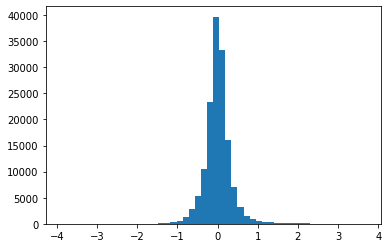

In [128]:
_ = plt.hist(pred_train, bins=50)

In [129]:
sum(pred_train * df_feats_target_train['return_24h'].to_numpy() >= 0) / len(pred_train)

0.6425243883529181

In [130]:
sum(pred_test * df_feats_target_test['return_24h'].to_numpy() >= 0) / len(pred_test)

0.49289788794984085

In [81]:
df_train_sampled = df_feats_target_train.sample(1000)

for target_col in TARGET_COLS:
    rf_model = RandomForestRegressor()
    rf_model.fit(
        df_train_sampled[FEAT_COLS],
        df_train_sampled[target_col],
    )
    pred_train = rf_model.predict(df_feats_target_train[FEAT_COLS])
    pred_test = rf_model.predict(df_feats_target_test[FEAT_COLS])
    train_acc = sum(pred_train * df_feats_target_train[target_col].to_numpy() >= 0) / len(pred_train)
    test_acc = sum(pred_test * df_feats_target_test[target_col].to_numpy() >= 0) / len(pred_test)
    print(f'{target_col}, train_acc : {train_acc}, test_acc : {test_acc}')

return_1h, train_acc : 0.5237478847696674, test_acc : 0.5133720084675921
return_3h, train_acc : 0.545786730848317, test_acc : 0.49814973417578334
return_6h, train_acc : 0.5470676671453323, test_acc : 0.49684081250101
return_12h, train_acc : 0.5850912498567374, test_acc : 0.4985052437664625
return_18h, train_acc : 0.5832844555009472, test_acc : 0.4951763812355574
return_24h, train_acc : 0.6079121412535647, test_acc : 0.49074867087891666
return_48h, train_acc : 0.662675538835966, test_acc : 0.4899083754827659
return_72h, train_acc : 0.7083914810994478, test_acc : 0.44336893815749073
return_120h, train_acc : 0.7899399308294399, test_acc : 0.5011715656965564
return_168h, train_acc : 0.8213363536462863, test_acc : 0.43163712166507767
return_720h, train_acc : 0.9339980718537845, test_acc : 0.334518365302264
return_1440h, train_acc : 0.9783252095005023, test_acc : 0.28854451141670573
return_2160h, train_acc : 0.9785611714499525, test_acc : 0.25735662459803177


In [131]:
len(FEAT_COLS)

43

In [132]:
df_train_sampled = df_feats_target_train.sample(10000)

for target_col in TARGET_COLS:
    rf_model = RandomForestRegressor()
    rf_model.fit(
        df_train_sampled[FEAT_COLS],
        df_train_sampled[target_col],
    )
    pred_train = rf_model.predict(df_feats_target_train[FEAT_COLS])
    pred_test = rf_model.predict(df_feats_target_test[FEAT_COLS])
    train_acc = sum(pred_train * df_feats_target_train[target_col].to_numpy() >= 0) / len(pred_train)
    test_acc = sum(pred_test * df_feats_target_test[target_col].to_numpy() >= 0) / len(pred_test)
    print(f'{target_col}, train_acc : {train_acc}, test_acc : {test_acc}')

return_1h, train_acc : 0.6517606132313978, test_acc : 0.49974952733383965
return_3h, train_acc : 0.748383660646266, test_acc : 0.5107864841717434
return_6h, train_acc : 0.8222936849840558, test_acc : 0.5066658048252347
return_12h, train_acc : 0.8755267007800228, test_acc : 0.5071344311038573
return_18h, train_acc : 0.9045769876423356, test_acc : 0.522049674385534
return_24h, train_acc : 0.9181481706207147, test_acc : 0.5124670749640451
return_48h, train_acc : 0.9451219923278658, test_acc : 0.47054926231759936
return_72h, train_acc : 0.9585246310566377, test_acc : 0.44781280804098056
return_120h, train_acc : 0.9601022052329619, test_acc : 0.45380799250197956
return_168h, train_acc : 0.9667361068975049, test_acc : 0.46581452095082654
return_720h, train_acc : 0.990615456181866, test_acc : 0.334518365302264
return_1440h, train_acc : 0.996184158188891, test_acc : 0.28854451141670573
return_2160h, train_acc : 0.9958807785395978, test_acc : 0.25735662459803177


In [133]:
df_feats_buy = create_single_ts_features(
    df_btc_return['price_buy'],
    macd_fastperiod=scale*12,
    macd_slowperiod=scale*26,
    macd_signalperiod=scale*9,
    bb_periods=[scale*7, scale*20, scale*30, scale*60],
    basic_stats_period=scale*14,
    atr_period=scale*14,
    return_lags=[scale*1, scale*3, scale*7, scale*10, scale*20, scale*30, scale*60],
    col_name_prefix='buy',
)
df_feats_sell = create_single_ts_features(
    df_btc_return['price_sell'],
    macd_fastperiod=scale*12,
    macd_slowperiod=scale*26,
    macd_signalperiod=scale*9,
    bb_periods=[scale*7, scale*20, scale*30, scale*60],
    basic_stats_period=scale*14,
    atr_period=scale*14,
    return_lags=[scale*1, scale*3, scale*7, scale*10, scale*20, scale*30, scale*60],
    col_name_prefix='sell',
)
df_feats_spread = create_single_ts_features(
    df_btc_return['price_sell']-df_btc_return['price_buy'],
    macd_fastperiod=scale*12,
    macd_slowperiod=scale*26,
    macd_signalperiod=scale*9,
    bb_periods=[scale*7, scale*20, scale*30, scale*60],
    basic_stats_period=scale*14,
    atr_period=scale*14,
    return_lags=[scale*1, scale*3, scale*7, scale*10, scale*20, scale*30, scale*60],
    col_name_prefix='spread',
)
df_feats = pd.concat(
    [df_feats_buy, df_feats_sell, df_feats_spread],
    axis=1
)

df_feats.dropna(inplace=True)
FEAT_COLS = df_feats.columns.tolist()

df_feats_target = df_feats.merge(df_btc_return, how='inner', left_index=True, right_index=True)
df_feats_target = df_feats_target.clip(-100000000000000, 100000000000000)

df_feats_target_train = df_feats_target[df_feats_target.index < '2021-06-01']
df_feats_target_test = df_feats_target[df_feats_target.index >= '2021-06-01']

ss = StandardScaler()
feats_target_train = ss.fit_transform(df_feats_target_train)
df_feats_target_train = pd.DataFrame(
    data=feats_target_train,
    columns=df_feats_target_train.columns,
    index=df_feats_target_train.index
)
feats_target_test = ss.transform(df_feats_target_test)
df_feats_target_test = pd.DataFrame(
    data=feats_target_test,
    columns=df_feats_target_test.columns,
    index=df_feats_target_test.index
)

In [102]:
df_train_sampled = df_feats_target_train.sample(1000)

for target_col in TARGET_COLS:
    rf_model = RandomForestRegressor()
    rf_model.fit(
        df_train_sampled[FEAT_COLS],
        df_train_sampled[target_col],
    )
    pred_train = rf_model.predict(df_feats_target_train[FEAT_COLS])
    pred_test = rf_model.predict(df_feats_target_test[FEAT_COLS])
    train_acc = sum(pred_train * df_feats_target_train[target_col].to_numpy() >= 0) / len(pred_train)
    test_acc = sum(pred_test * df_feats_target_test[target_col].to_numpy() >= 0) / len(pred_test)
    print(f'{target_col}, train_acc : {train_acc}, test_acc : {test_acc}')

return_1h, train_acc : 0.560030845889192, test_acc : 0.5029960053262317
return_3h, train_acc : 0.5821568394827382, test_acc : 0.5083222370173103
return_6h, train_acc : 0.6131213667101673, test_acc : 0.4863515312916112
return_12h, train_acc : 0.671076046980662, test_acc : 0.551930758988016
return_18h, train_acc : 0.6919563412029897, test_acc : 0.5376165113182424
return_24h, train_acc : 0.708921580258631, test_acc : 0.48934753661784286
return_48h, train_acc : 0.7625459722386997, test_acc : 0.4647137150466045
return_72h, train_acc : 0.7943409657136078, test_acc : 0.47536617842876167
return_120h, train_acc : 0.8229920512516312, test_acc : 0.45206391478029295
return_168h, train_acc : 0.8407877565547515, test_acc : 0.5143142476697736
return_720h, train_acc : 0.9480958595325661, test_acc : 0.4021304926764314
return_1440h, train_acc : 0.9823229327322339, test_acc : 0.1584553928095872
return_2160h, train_acc : 0.9844584173686084, test_acc : 0.43641810918774965


In [134]:
import numpy as np

In [135]:
len(FEAT_COLS)

129

In [139]:
df_train_sampled = df_feats_target_train.sample(10000)

for target_col in TARGET_COLS:
    rf_model = RandomForestRegressor()
    rf_model.fit(
        df_train_sampled[FEAT_COLS],
        df_train_sampled[target_col],
    )
    pred_train = rf_model.predict(df_feats_target_train[FEAT_COLS])
    pred_test = rf_model.predict(df_feats_target_test[FEAT_COLS])
    train_acc = sum(pred_train * df_feats_target_train[target_col].to_numpy() >= 0) / len(pred_train)
    test_acc = sum(pred_test * df_feats_target_test[target_col].to_numpy() >= 0) / len(pred_test)
    thresh_test_accs = {}
    for thresh in [0.1, 0.2, 0.4, 0.7, 1.0, 2.0]:
        filter_indices = np.where(np.abs(pred_test) > thresh)
        if len(pred_test[filter_indices]) == 0:
            continue
        test_acc_thresh = sum(pred_test[filter_indices] * df_feats_target_test[target_col].to_numpy()[filter_indices] >= 0) / len(pred_test[filter_indices])
        thresh_test_accs[f'test_acc_th{thresh}'] = test_acc_thresh
    print(thresh_test_accs)
    print(f'{target_col}, train_acc : {train_acc}, test_acc : {test_acc}')

{'test_acc_th0.1': 0.5280830280830281, 'test_acc_th0.2': 0.5097323600973236, 'test_acc_th0.4': 0.5239852398523985, 'test_acc_th0.7': 0.5730337078651685, 'test_acc_th1.0': 0.5555555555555556}
return_1h, train_acc : 0.8269071064183177, test_acc : 0.5149800266311585
{'test_acc_th0.1': 0.5177907594264471, 'test_acc_th0.2': 0.533, 'test_acc_th0.4': 0.5454545454545454, 'test_acc_th0.7': 0.5862068965517241, 'test_acc_th1.0': 0.25}
return_3h, train_acc : 0.888005694625697, test_acc : 0.5046604527296937
{'test_acc_th0.1': 0.5051789077212806, 'test_acc_th0.2': 0.5065234075211051, 'test_acc_th0.4': 0.5195530726256983, 'test_acc_th0.7': 0.5806451612903226, 'test_acc_th1.0': 1.0}
return_6h, train_acc : 0.9112587495551073, test_acc : 0.5043275632490013
{'test_acc_th0.1': 0.5309060118543607, 'test_acc_th0.2': 0.541289592760181, 'test_acc_th0.4': 0.5657894736842105, 'test_acc_th0.7': 0.6030534351145038, 'test_acc_th1.0': 0.9090909090909091}
return_12h, train_acc : 0.9376557124214023, test_acc : 0.5249

In [138]:
train_acc

0.8801755842923241

In [141]:
from fin_app_models.processing import (
    IStructuredDataProcessing,
    DefaultStructuredDataProcessing
)

In [142]:
lasso_model = LassoRegression(data_processors=[DefaultStructuredDataProcessing()])

In [145]:
lasso_model.train(
    y_train=df_train_sampled['return_24h'],
    X_train=df_train_sampled[FEAT_COLS],
)

DEBUG : 2022-01-03 15:05:01,008 : [LassoRegression] Start tuning parameters
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3591539866524727, tolerance: 0.32630475670655923
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.249915752358902, tolerance: 0.6530243610565277
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.43647087897989, tolerance: 0.8202656283697185
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge

In [152]:
((lasso_model.predict(X=df_feats_target_train[FEAT_COLS]).to_numpy() * df_feats_target_train['return_24h']) >= 0).sum() / len(df_feats_target_train['return_24h'])

0.564361134179618

In [153]:
((lasso_model.predict(X=df_feats_target_test[FEAT_COLS]).to_numpy() * df_feats_target_test['return_24h']) >= 0).sum() / len(df_feats_target_test['return_24h'])

0.48468708388814913

In [154]:
lgbm_model = LGBMRegression(data_processors=[DefaultStructuredDataProcessing()])

In [155]:
lgbm_model.train(
    y_train=df_train_sampled['return_24h'],
    X_train=df_train_sampled[FEAT_COLS],
)

DEBUG : 2022-01-03 15:14:41,743 : [LGBMRegression] Start tuning parameters
DEBUG : 2022-01-03 15:22:24,204 : [LGBMRegression] Done tuning parameters
DEBUG : 2022-01-03 15:22:24,206 : [LGBMRegression] best_pramas : {'objective': 'regression', 'metric': 'rmse', 'verbose': -1, 'feature_pre_filter': False, 'lambda_l1': 4.948921429302396e-07, 'lambda_l2': 0.2059170393475455, 'num_leaves': 253, 'feature_fraction': 0.716, 'bagging_fraction': 0.935834613997872, 'bagging_freq': 7, 'min_child_samples': 20, 'num_iterations': 100, 'early_stopping_round': None}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argume

In [156]:
((lgbm_model.predict(X=df_feats_target_train[FEAT_COLS]).to_numpy() * df_feats_target_train['return_24h']) >= 0).sum() / len(df_feats_target_train['return_24h'])

0.9515956815755131

In [157]:
((lgbm_model.predict(X=df_feats_target_test[FEAT_COLS]).to_numpy() * df_feats_target_test['return_24h']) >= 0).sum() / len(df_feats_target_test['return_24h'])

0.48834886817576567